## Logistic Regression using Scikit-Learn

In this tutorial, we will implement Logistic Regression using Scikit-Learn.

So, let's get started. 


### Step-1 Import Dependencies

#### numpy: 
for numerical calculations

#### pandas: 
for data modelling and access data from files

#### sklearn.preprocessing: 
Preprocessing data, scaling data points to bring all data points to same scale for easy calculations.

#### sklearn.model_selection:  
for cross validation, divide data into testing and training set.

#### sklearn.linear_model.LogisticRegression: 
Logistic Regression Classifier.

#### sklearn.metrics.accuracy_score: 
to calculate accuracy score of the classifier.

#### matplotlib:  
to plot data

In [16]:
# Import Dependecies

import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, linear_model
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step-2: Load Dataset

Now that we are ready with our dependecies, it's time to load our dataset.

This time we'll be using "Wisconsin Breast Cancer Dataset". You can download the dataset from the dataset folder from the Github repository or download from this link [https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)]

Let's have a look at our data.

This dataset has the following attributes:
1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)

It has 11 features. These features contribute together to tell whether the tumor is "Malignant : 4" or "Benign : 2".

Let's load the data and get some insight into it.

In [17]:
# Load Data

df = pd.read_csv('dataset/breast-cancer-wisconsin-data.csv')

In [18]:
# Let's have a look at the data
# Let's print first 5 row values from data.

print(df.head())

   1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4


### Step-3: Adding Names to Dataset

As we can see that the data does not have any name for the column. So, either we can add the names to the data in csv file itself or go the second way.

I will be explaining the second way here. Let's see.

In [19]:
# Load data with Column names
# Here we provide the names for each Column.

df = pd.read_csv('dataset/breast-cancer-wisconsin-data.csv', names=['id', 'clump_thickness','unif_cell_size',
                                                                           'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size',
                                                                           'bare_nuclei', 'bland_chromatin', 'normal_nucleoli','mitoses','class'])

In [20]:
# Let's check the data again

print(df.head())

        id  clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion  \
0  1000025                5               1                1              1   
1  1002945                5               4                4              5   
2  1015425                3               1                1              1   
3  1016277                6               8                8              1   
4  1017023                4               1                1              3   

   single_epith_cell_size bare_nuclei  bland_chromatin  normal_nucleoli  \
0                       2           1                3                1   
1                       7          10                3                2   
2                       2           2                3                1   
3                       3           4                3                7   
4                       2           1                3                1   

   mitoses  class  
0        1      2  
1        1      2  
2        1    

Perfect. Now we atleast have some names to refer to while processing the data.

### Step-4 Feature Selection

Now, since we have a lot of features i.e. each column is a feature. Hence, we need to find out which features are the most informative i.e. which features selected will lead to maximizing accuracy.

* Correlation:
Let's check the correlation between the data points of different features.

In [21]:
# Correlation between different features
correlation = df.corr()
print(df.corr())

                              id  clump_thickness  unif_cell_size  \
id                      1.000000        -0.055308       -0.041603   
clump_thickness        -0.055308         1.000000        0.644913   
unif_cell_size         -0.041603         0.644913        1.000000   
unif_cell_shape        -0.041576         0.654589        0.906882   
marg_adhesion          -0.064878         0.486356        0.705582   
single_epith_cell_size -0.045528         0.521816        0.751799   
bland_chromatin        -0.060051         0.558428        0.755721   
normal_nucleoli        -0.052072         0.535835        0.722865   
mitoses                -0.034901         0.350034        0.458693   
class                  -0.080226         0.716001        0.817904   

                        unif_cell_shape  marg_adhesion  \
id                            -0.041576      -0.064878   
clump_thickness                0.654589       0.486356   
unif_cell_size                 0.906882       0.705582   
unif_cel

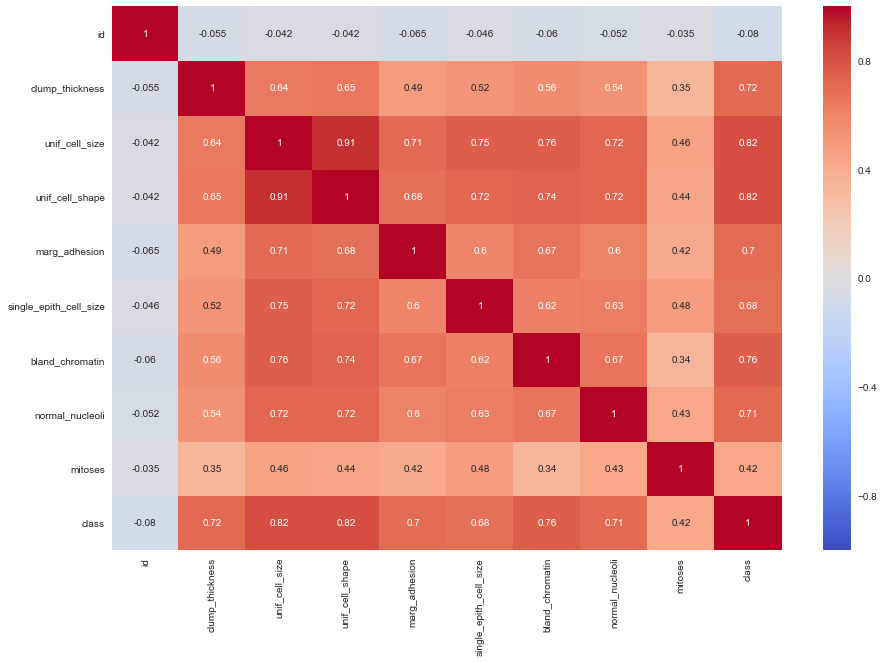

In [22]:
# Let's see this in a heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

We can clearly see that when we take the correlation of features, almost all the Correlation coefficients are positive values but only "id" has a negative correlation with all the featues in the data.

So, this shows that, the "id" column is of no use to us. Also, removing this will not affect the accuracy at all.

So, we will remove the "id" column from the dataset. This is what we call "Feature Selection".

In [23]:
# Feature Selection

df.drop(['id'], 1, inplace=True)

# Filtered Dataset
print(df.head())

   clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion  \
0                5               1                1              1   
1                5               4                4              5   
2                3               1                1              1   
3                6               8                8              1   
4                4               1                1              3   

   single_epith_cell_size bare_nuclei  bland_chromatin  normal_nucleoli  \
0                       2           1                3                1   
1                       7          10                3                2   
2                       2           2                3                1   
3                       3           4                3                7   
4                       2           1                3                1   

   mitoses  class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2  


Are we all done ?? Well not yet. This dataset contains empty or NaN values which have been repressented as "?". We have two options: Either replace the empty spaces by the Mean or Median value of the Column or replace the empty value with a very large negative value i.e. an outlier or remove the entire row consisting of empty value.

I'll go with the second option. Why replace it with an outlier value you ask ?? Well, we went over this in Linear Regression discussion and saw that the outliers are neglected. So, let's do it.

In [24]:
# Replace empty values with Outlier value

df.replace('?', -99999, inplace=True)

Well we are all done with the basic Data Modelling. Next step is to form the features and labels and train the Classifier.


### Step-5: Train the Classifier

So, let's train the Classifier. Firstly, we need to define the features and the labels.

Features: All column values except the "Class" which we need to predict i.e. "Malignant" or "Benign"

In [25]:
# Features
X = np.array(df.drop(['class'],1))

# Labels
y = np.array(df['class'])

In [26]:
# Let's have a look at our Features and Labels
print('Features: \n',X)
print('Labels: \n',y)

Features: 
 [[5 1 1 ..., 3 1 1]
 [5 4 4 ..., 3 2 1]
 [3 1 1 ..., 3 1 1]
 ..., 
 [5 10 10 ..., 8 10 2]
 [4 8 6 ..., 10 6 1]
 [4 8 8 ..., 10 4 1]]
Labels: 
 [2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4
 2 4 4 2 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4
 4 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2
 4 4 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2
 2 4 2 4 4 2 2 4 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4
 2 4 4 4 2 4 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4
 4 4 4 2 4 4 2 4 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 4 4 2 2 2
 2 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 4
 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 2 4 2 2 4 2 4 4 4 2 2
 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 2 2 4 2 4 2 4

Perfect. We are now ready to do the Cross-Validation step.

In [27]:
# Cross Validation
# Test Data: 20% of total data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

Now, we have the training and testing set. It's time to Train the Classifier and test the predictions.

In [28]:
# Define the Classifier
clf = linear_model.LogisticRegression(n_jobs = 10)

# Train the Classifier
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=10,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Well, now we have a trained Classifier, we need to check out the predictions for the Test Data and then see how accurate the predictions are.

So, let's get started.

In [29]:
# Predcitions on Test Data
y_pred = clf.predict(X_test)
print('Predicted Labels: ',y_pred)

Predicted Labels:  [2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 4 4 2 2 2 2 2 4 2 2 4 2 4 2 2 2 2 4 2 4 2 4
 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 4 2 2 2 4 2 2 4 2 4 4 2 2 4
 2 4 4 2 2 4 4 2 2 4 4 4 2 4 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 4 2 4 2 2 4 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 2 4 4 2 2]


We have the true labels i.e. y_test and the predicted labels y_pred. Now is a good time to see that how good our Classifier is i.e. how many labels did the Classifier Misclassify or classify correctly. So, let's calculate this.

In [30]:
# Number of Misclassified Labels
print('Number of Misclassified Labels: {}'.format((y_pred != y_test).sum()))

Number of Misclassified Labels: 6


Well our Classifier Misclassified only "6" values. But out of how many ??

In [31]:
print('Total Predicted Values: ',len(y_pred))

Total Predicted Values:  140


Woww !! Out of 140 values, only 6 values were Misclassified by our Trained Classifier. That's pretty impressive. Let's calculate the confidence and accuracy score for this.

In [32]:
# Confidence
confidence = clf.score(X_test, y_test)
print('Confidence of Classifier: ',confidence)

Confidence of Classifier:  0.957142857143


So, our Classifier is 95% confident of its predictions. That is what we saw above where only 6 values were misclassified from 140. Pretty good.

In [33]:
# Accuracy Score
acc = accuracy_score(y_test,y_pred)
print('Accuracy Score of Classifier: ',acc)

Accuracy Score of Classifier:  0.957142857143


Let's check the Confusion Matrix to see the number of True positive and False Positives.

In [34]:
# Confusin Matrix
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf)

Confusion Matrix: 
 [[91  1]
 [ 5 43]]


These values show that we have 91 True Positive values, 5 False Positive Values. Also, we have 1 False Negative Value and 43 True negative Values predicted.